In [1]:
import wandb
from ultralytics import YOLO
import os
from datetime import datetime
from utils import train_test_split_yolo

from pathlib import Path
import random

In [ ]:
# TODO: Componentise Train, Test, Validate
# TODO: Orchestrate Experiments
# TODO: Review Performance, W&B

In [2]:
# # --- SPLIT DIRS
# source_dir = "datasets/annotations/multi_class/yolo_11"
# train_test_split_yolo(source_dir=source_dir)

Dataset split complete:
Train: 156 images
Val: 20 images
Test: 20 images


In [3]:
# --- CONFIG
experiment_name = "yolo11n_ft_all"
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
run_name = f"{experiment_name}_{timestamp}"

In [5]:
def train(project_name="yolo_compliance", experiment_name="yolo11n_ft_all"):
    """Train YOLO model and track with W&B"""
    wandb.init(
        project=project_name,
        config={
            "dataset": "yolo_11",
            "model": "yolo11n.pt",
            "epochs": 200,
            "batch": -1,
            "imgsz": 640,
            "name": experiment_name,
        }
    )

    model = YOLO("yolo11n.pt")
    results = model.train(
        data="datasets/annotations/multi_class/yolo_11/data.yaml",
        epochs=wandb.config.epochs,
        batch=wandb.config.batch,
        name=run_name,
        project=f"runs/yolo_11/train/{experiment_name}",
        save=True,
        device="0"
    )

    model_path = f"models/yolo_11/yolo11n_ft_all{wandb.run.id}.pt"
    model.save(model_path)
    
    artifact = wandb.Artifact('trained_model', type='model')
    artifact.add_file(model_path)
    wandb.log_artifact(artifact)

    return run_name

In [6]:
train()

wandb: Currently logged in as: jshepp27 (jshepp27-mimetic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=datasets/annotations/multi_class/yolo_11/data.yaml, epochs=200, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/yolo_11/train/yolo11n_ft_all, name=yolo11n_ft_all_20250216_235543, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

train: Scanning /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/train/labels... 156 images, 4 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<00:00, 1880.07it/s]

train: New cache created: /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 15.56G total, 0.10G reserved, 0.06G allocated, 15.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2591010       6.446         0.457         31.22         131.4        (1, 3, 640, 640)                    list
     2591010       12.89         0.606         23.12         82.58        (2, 3, 640, 640)                    list
     2591010       25.78         0.900         26.09         81.55        (4, 3, 640, 640)                    list
     2591010       51.57         1.523         31.06         92.75        (8, 3, 640, 640)                    list
     2591010       103.1         2.728         55.64         114.5       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 122 for CUDA:0 9.39G/15.56G (60%) ✅


train: Scanning /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/train/labels.cache... 156 images, 4 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]
val: Scanning /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 837.39it/s]

val: New cache created: /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/val/labels.cache


Plotting labels to runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000953125), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      15.9G     0.9888      3.852      1.147        192        640: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         20         76    0.00426        0.4     0.0923     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      15.8G      1.018      3.901      1.153        176        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         20         76    0.00443        0.4     0.0973     0.0888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200        16G       1.04        3.9      1.168        218        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         20         76    0.00337        0.4      0.122      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200        16G     0.9391      3.881      1.128        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         20         76    0.00358        0.4      0.151      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200        16G     0.7729      3.657      1.024        192        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         20         76     0.0101      0.433      0.182      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200        16G     0.7321       3.43      0.986        189        640: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         20         76     0.0194      0.532      0.216      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200        16G     0.6736      3.121     0.9683        179        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         20         76     0.0227       0.61      0.245      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200        16G     0.7097      2.912     0.9961        175        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         20         76     0.0208      0.599      0.254      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200        16G     0.7151      2.683      0.971        210        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         20         76     0.0161       0.62      0.276       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200        16G     0.7303      2.322      1.001        153        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         20         76     0.0127       0.62      0.318       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200        16G      0.675      1.981     0.9505        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         76     0.0123      0.631      0.346      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200        16G     0.6698      1.815     0.9385        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         20         76      0.012      0.589      0.359      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200        16G     0.6737      1.561     0.9495        198        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         20         76     0.0127      0.578      0.329      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200        16G     0.6405      1.462     0.9497        185        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         20         76     0.0156      0.578      0.306      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200        16G     0.6581       1.34     0.9412        200        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         20         76     0.0171      0.567      0.314      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      15.8G     0.6195      1.246     0.9514        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         20         76     0.0168      0.556      0.306      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200        16G     0.6112      1.176     0.9387        208        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         20         76     0.0172      0.556      0.312      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200        16G     0.6017      1.097     0.9223        216        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         20         76     0.0185      0.567      0.304      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      15.8G     0.5781      1.012     0.9091        150        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         20         76      0.956      0.216      0.307      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200        16G     0.5634      1.003     0.9174        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         20         76      0.935      0.251      0.341       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200        16G     0.5688     0.9546     0.8869        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         20         76     0.0299      0.685      0.337      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200        16G      0.606      1.008     0.9171        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         20         76     0.0258      0.633      0.335      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200        16G     0.5684      0.956     0.8954        165        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         20         76     0.0306      0.675      0.355      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      15.8G     0.5488     0.9387     0.9091        161        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         20         76      0.605      0.355      0.385      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200        16G     0.5944      0.915     0.9084        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         20         76      0.976      0.242      0.417      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      15.8G     0.5295     0.8808     0.8871        154        640: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         20         76      0.983      0.235      0.423      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200        16G     0.5453     0.8664     0.8808        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         20         76      0.998        0.2      0.546      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200        16G      0.512     0.8223      0.881        214        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         20         76      0.947       0.32      0.606      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200        16G     0.5638     0.8622      0.903        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         20         76      0.999        0.2       0.59      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      15.8G     0.5595     0.8188     0.9155        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         20         76      0.996      0.221       0.61      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      15.8G      0.533     0.8034     0.8925        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         20         76      0.998      0.223      0.586      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200        16G     0.5603     0.9163     0.9086        129        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         20         76          1      0.212      0.574      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200        16G     0.4993     0.7851     0.8855        213        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         76      0.999      0.217       0.66      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200        16G     0.5196     0.7696     0.8856        201        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         20         76      0.995      0.223      0.795      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200        16G     0.4843     0.7448     0.8733        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all         20         76      0.994       0.23      0.665      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200        16G     0.4942     0.7621       0.88        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         20         76      0.993      0.244      0.891        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200        16G     0.5172     0.7917     0.8825        184        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         76      0.995      0.301      0.846      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200        16G     0.5293     0.8038      0.883        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         20         76      0.996      0.334      0.869      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200        16G      0.523     0.7788     0.8978        164        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         20         76      0.995      0.335      0.927      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      15.8G     0.4991     0.7975      0.887        174        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         20         76      0.996      0.312      0.973      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200        16G     0.5387     0.7733     0.9076        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         20         76      0.996      0.379      0.966      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200        16G     0.5526     0.7866     0.8897        165        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         20         76      0.997      0.266       0.93       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200        16G     0.5346     0.8121     0.8887        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         20         76      0.995      0.281      0.942      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200        16G     0.5116     0.7354     0.8799        185        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         76      0.994      0.363      0.951      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200        16G     0.5087     0.7314     0.8734        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all         20         76      0.997       0.37      0.956      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200        16G     0.5117     0.7635     0.8799        197        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         20         76          1      0.364      0.968      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      15.8G       0.51     0.7425      0.892        193        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         20         76       0.97      0.489      0.948      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200        16G     0.5125     0.7288     0.8756        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         20         76       0.98      0.457      0.943      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200        16G     0.5171     0.7412     0.8943        174        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         20         76      0.994      0.317      0.936      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      15.8G     0.4968     0.7216     0.8627        182        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         20         76      0.992      0.563      0.964      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200        16G     0.5107     0.7262      0.893        197        640: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         20         76      0.977      0.524       0.97      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200        16G     0.5037     0.7265     0.8861        224        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         20         76      0.991       0.54      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200        16G     0.4874     0.6777     0.8843        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         20         76      0.987       0.65       0.92      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200        16G     0.5076       0.68     0.8874        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         76      0.976      0.781      0.934      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200        16G      0.481     0.6819     0.8836        204        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         20         76      0.986      0.832      0.965      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200        16G     0.5116     0.7178     0.8893        148        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         20         76      0.951       0.84      0.966      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200        16G     0.4972      0.722     0.8772        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         20         76      0.941      0.822       0.94      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      15.8G     0.4878      0.684     0.8783        185        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         20         76      0.951      0.888      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200        16G      0.509     0.7019     0.8683        171        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         20         76      0.962      0.919      0.965      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200        16G     0.4849     0.6797     0.8867        161        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         20         76       0.98      0.952      0.974       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200        16G     0.5003     0.6901     0.8782        175        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         20         76      0.972      0.947      0.981      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200        16G     0.4844      0.657     0.8732        185        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         20         76      0.976      0.905      0.983      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200        16G     0.4577     0.6706     0.8708        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         20         76      0.983      0.863      0.975      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200        16G      0.485     0.6815     0.8747        149        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         20         76      0.946      0.878      0.981      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      15.8G     0.4688     0.6479     0.8754        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         20         76      0.943       0.95      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      15.8G     0.4773     0.6274     0.8744        206        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         20         76      0.932      0.966      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      15.8G     0.4875     0.6334     0.8812        197        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all         20         76      0.933      0.967      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200        16G     0.4833     0.6607     0.8817        159        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         20         76      0.944      0.969      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200        16G        0.5      0.644     0.8746        206        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         20         76      0.954      0.971      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200        16G     0.4606     0.6244     0.8651        172        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         20         76       0.97       0.97      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200        16G     0.4628     0.5771     0.8737        200        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         20         76      0.967      0.984      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200        16G     0.4693     0.6122     0.8751        138        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all         20         76      0.946      0.984      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200        16G     0.4589     0.5953     0.8769        162        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         20         76      0.949      0.978      0.991      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200        16G      0.474     0.5951     0.8757        182        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         20         76      0.951      0.989      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200        16G      0.463     0.6384      0.882        155        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         20         76      0.971      0.994      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200        16G      0.449     0.5796     0.8677        170        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         20         76      0.962      0.994      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200        16G     0.4551      0.597      0.879        152        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         20         76      0.968      0.996      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200        16G     0.4514     0.6153     0.8643        222        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all         20         76      0.967      0.933      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200        16G     0.4685     0.6171     0.8764        195        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         20         76      0.976          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200        16G     0.4652     0.6252     0.8803        157        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all         20         76      0.933      0.972      0.993      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200        16G     0.4471     0.5924     0.8672        174        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all         20         76      0.946      0.914      0.988      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      15.8G     0.4347      0.602     0.8622        198        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         20         76      0.939      0.989      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200        16G     0.4354     0.5452     0.8586        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         20         76      0.984      0.979      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200        16G      0.436      0.567     0.8413        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         20         76      0.977      0.958      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200        16G     0.4574     0.5722     0.8857        142        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         20         76      0.965       0.98      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200        16G     0.4805     0.6157     0.8667        184        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         20         76      0.945      0.969      0.994      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200        16G     0.4497     0.5802     0.8453        182        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         20         76      0.969      0.945      0.989      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200        16G     0.4838     0.5749     0.8753        191        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         20         76      0.988      0.956      0.966      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200        16G     0.4665       0.56     0.8626        187        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         20         76      0.983      0.955      0.959      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200        16G     0.4536     0.5658     0.8548        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         20         76      0.967       0.94      0.956      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200        16G     0.4533     0.5652     0.8619        186        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         20         76      0.967      0.948      0.974      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200        16G     0.4348     0.5479     0.8666        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         76       0.96      0.958      0.991      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200        16G     0.4126     0.5129     0.8446        195        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         76      0.967      0.977      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200        16G     0.4426     0.5365     0.8501        171        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76      0.968      0.992      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200        16G     0.4238     0.5181     0.8589        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         20         76      0.977      0.996      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200        16G      0.421     0.5234     0.8514        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all         20         76      0.976      0.988      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200        16G     0.4336     0.5178     0.8643        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.977      0.979      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200        16G     0.4035     0.4951     0.8495        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         20         76      0.981      0.976      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      15.8G     0.4196     0.5319     0.8669        166        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         20         76       0.98      0.982      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200        16G     0.4158     0.5108     0.8521        171        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all         20         76      0.981      0.964      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200        16G     0.4231     0.5222     0.8498        190        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         20         76      0.953      0.982      0.994      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200        16G     0.4112     0.4996     0.8471        157        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         20         76      0.956      0.991      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200        16G      0.425     0.5273     0.8588        183        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         20         76      0.961          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200        16G      0.397     0.5102     0.8534        172        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all         20         76      0.954      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200        16G     0.4066     0.4936     0.8383        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         20         76      0.964      0.981      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      15.8G     0.4375     0.5147     0.8709        176        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         20         76      0.955      0.988      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200        16G      0.415     0.5354     0.8627        169        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         20         76      0.962      0.986      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200        16G      0.396     0.4872     0.8386        218        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         20         76      0.964      0.982      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200        16G     0.4339     0.5104     0.8509        190        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         20         76      0.963       0.98      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200        16G     0.4316     0.5255     0.8731        158        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         76      0.951      0.994      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      15.8G     0.3822     0.4838      0.831        174        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         20         76      0.965      0.993      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200        16G     0.3784     0.4659     0.8519        153        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76       0.95      0.996      0.993      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200        16G     0.4255      0.498     0.8559        154        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         20         76      0.955      0.979      0.992      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200        16G     0.3984     0.4859     0.8563        170        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         20         76      0.983      0.956      0.991      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200        16G     0.3946     0.4757     0.8426        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         20         76       0.98      0.956      0.988      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      15.8G     0.4037     0.4611     0.8347        208        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         20         76       0.98      0.956      0.988      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200        16G     0.3987     0.4676     0.8451        169        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         20         76       0.98      0.956      0.989      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200        16G     0.3771     0.4617     0.8473        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all         20         76      0.983      0.952       0.99      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200        16G     0.4146     0.4682     0.8554        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         20         76      0.983      0.947      0.991      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      15.8G      0.398     0.4642     0.8536        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         76      0.982       0.96      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200        16G     0.4031     0.4433      0.852        175        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         20         76      0.987      0.958      0.993      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200        16G     0.3875     0.4409     0.8364        192        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         20         76      0.987      0.957      0.993      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200        16G     0.3819     0.4546     0.8464        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         20         76      0.985      0.958      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      15.8G     0.3738     0.4361      0.838        168        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         20         76      0.984      0.958      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      15.8G      0.359     0.4336     0.8387        191        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         20         76      0.987      0.958      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200        16G     0.3554     0.4392     0.8396        167        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         20         76      0.966      0.982      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200        16G       0.38     0.4387     0.8466        168        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         20         76      0.985      0.969      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200        16G      0.363     0.4393     0.8406        174        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         20         76      0.983       0.97      0.994       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200        16G     0.3735     0.4631      0.839        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         20         76      0.984      0.967      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200        16G     0.3943     0.4551     0.8514        186        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         20         76      0.984       0.97      0.989      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      15.8G     0.3829     0.4417     0.8467        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76      0.973      0.983      0.992      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200        16G     0.3762     0.4354     0.8403        226        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.982      0.986      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      15.8G     0.3822     0.4363     0.8396        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         20         76      0.986      0.989      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      15.8G     0.3736     0.4338     0.8486        184        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76      0.986      0.991      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200        16G     0.3596     0.4094     0.8352        177        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.982      0.981      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      15.8G     0.3774     0.4319      0.846        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         76      0.974       0.98      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200        16G     0.3679     0.4338     0.8506        187        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         20         76       0.97       0.98      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200        16G     0.3616     0.4264     0.8332        184        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all         20         76      0.965          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200        16G     0.3494     0.4169     0.8399        161        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         20         76      0.975          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200        16G     0.3684     0.4065      0.838        200        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         76      0.975          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      15.8G     0.3511     0.4209     0.8292        162        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         20         76      0.973      0.998      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200        16G     0.3813     0.4087     0.8394        192        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76       0.97       0.99      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200        16G      0.363     0.4074     0.8457        169        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         20         76      0.971      0.986      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200        16G     0.3424     0.4043     0.8398        166        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         20         76      0.968      0.985      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      15.8G     0.3512     0.4062     0.8378        210        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         20         76      0.967      0.981      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200        16G     0.3664     0.4095     0.8429        179        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         76      0.963      0.983      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200        16G     0.3625     0.4046     0.8399        182        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         20         76      0.969      0.989      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      15.8G     0.3601     0.4011     0.8389        198        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         76      0.974      0.992      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200        16G     0.3688      0.408     0.8409        228        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         20         76      0.976      0.993      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200        16G     0.3428     0.3846     0.8305        201        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.977      0.985      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200        16G     0.3769     0.4079     0.8413        200        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         20         76      0.977      0.976      0.993      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200        16G     0.3756      0.407     0.8424        182        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         20         76      0.971      0.975      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200        16G     0.3417     0.3905     0.8564        195        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         20         76      0.967       0.98      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      15.8G     0.3479     0.3893     0.8437        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         76      0.981      0.969      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200        16G     0.3436     0.3941     0.8318        196        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all         20         76      0.984      0.969      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200        16G     0.3354     0.3955     0.8373        168        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         20         76      0.985      0.969      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200        16G     0.3663     0.4074     0.8491        198        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all         20         76      0.987       0.97      0.994      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200        16G     0.3252     0.3815     0.8394        149        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         76       0.98      0.991      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      15.8G     0.3391     0.4025     0.8444        154        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         76      0.985       0.99      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200        16G     0.3379     0.3825     0.8301        169        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         20         76      0.987      0.991      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200        16G     0.3224     0.3857     0.8353        143        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         20         76      0.986       0.99      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200        16G     0.3232     0.3701     0.8283        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all         20         76       0.98       0.99      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200        16G     0.3237      0.381     0.8309        177        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         76      0.969          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200        16G     0.3309     0.3666     0.8283        191        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.973      0.996      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200        16G     0.3216     0.3566      0.831        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         76      0.974      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200        16G     0.3172     0.3897     0.8301        167        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         20         76      0.972      0.999      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      15.8G     0.3272     0.3668     0.8304        159        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         76      0.974      0.999      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200        16G     0.3175     0.3686     0.8431        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         76      0.974          1      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200        16G     0.3063     0.3701      0.823        156        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         20         76      0.974      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200        16G     0.3353     0.3846     0.8334        140        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all         20         76      0.976      0.993      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200        16G     0.3274     0.3669      0.837        181        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         20         76      0.975      0.992      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200        16G     0.3119     0.3495     0.8151        190        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         20         76      0.974      0.993      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200        16G     0.3231      0.361     0.8319        160        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         76      0.974      0.997      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      15.8G     0.3224     0.3533      0.826        188        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all         20         76      0.975      0.997      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      15.8G     0.3348      0.361      0.844        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         20         76      0.976      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200        16G     0.3175     0.3653     0.8286        187        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         20         76      0.978      0.996      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200        16G     0.3223     0.3728     0.8357        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         76      0.979      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200        16G     0.3133     0.3691     0.8311        163        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         20         76      0.977          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200        16G     0.3131     0.3521     0.8369        191        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         76      0.977          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      15.8G      0.314     0.3585     0.8307        205        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         76      0.975      0.997      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200        16G     0.3046     0.3523     0.8271        160        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         76      0.973      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200        16G     0.2979      0.348     0.8247        187        640: 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         76      0.971      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200        16G     0.3051     0.3487     0.8255        186        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         20         76      0.972      0.997      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200        16G     0.3144     0.3459     0.8358        212        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         20         76      0.976          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200        16G      0.303     0.3459     0.8214        164        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         20         76       0.98          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200        16G      0.319     0.3481     0.8408        158        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76      0.981      0.997      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200        16G     0.2879      0.334     0.8174        178        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         20         76      0.982      0.998      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200        16G     0.2905     0.3468     0.8194        180        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         20         76      0.982          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200        16G     0.3056     0.3593     0.8396        156        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         20         76       0.98          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200        16G      0.284     0.3321     0.8244        172        640: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         20         76      0.979          1      0.995      0.959


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      15.8G     0.3104     0.4263     0.8505        102        640: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         20         76      0.977          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      15.8G     0.3254     0.4564     0.8487         72        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all         20         76      0.972          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      15.8G     0.3174     0.4173     0.8454         88        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         20         76      0.964          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      15.8G     0.3179     0.4094      0.839         93        640: 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         20         76      0.958      0.999      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      15.7G     0.3256     0.4214      0.843         96        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         20         76      0.952      0.997      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      15.8G     0.2991     0.4024     0.8396         98        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         20         76       0.95      0.999      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      15.8G     0.2986     0.4065     0.8599         90        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         20         76       0.95          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      15.8G     0.2938     0.3903     0.8348         95        640: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         20         76      0.953          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      15.8G     0.2911     0.3949     0.8248         81        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         20         76      0.957          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      15.8G      0.291     0.3781     0.8549         87        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         20         76      0.958      0.999      0.995      0.955



200 epochs completed in 0.112 hours.
Optimizer stripped from runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543/weights/last.pt, 5.5MB
Optimizer stripped from runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543/weights/best.pt, 5.5MB

Validating runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


                   all         20         76      0.975      0.997      0.995      0.965
  nectar_price_lozenge          3          3      0.922          1      0.995      0.995
          nectar_putty         16         16      0.983          1      0.995      0.978
       sainsburys_logo         19         19      0.987          1      0.995      0.958
      terms_conditions         18         18          1      0.986      0.995      0.901
                  wave         20         20      0.985          1      0.995      0.995
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_20250216_235543


'yolo11n_ft_all_20250216_235543'

In [7]:
model = YOLO("models/yolo_11/yolo11n_ft_all5ci93fkb.pt")

def validate(run_name, model, experiment_name="yolo11n_ft_all"):
    """Validate trained model on validation set"""

    results = model.val(
        data="datasets/annotations/multi_class/yolo_11/data.yaml",
        split="val",
        name=f"{experiment_name}_val",
        project=f"runs/yolo_11/train/{experiment_name}",
        device="0"
    )
    return results


def test(run_name, model, experiment_name="yolo11n_ft_all"):
    """Evaluate trained model on test set"""
    
    results = model.val(
        data="datasets/annotations/multi_class/yolo_11/data.yaml",
        split="test",
        name=f"{experiment_name}_test",
        project=f"runs/yolo_11/train/{experiment_name}",
        device="0"
    )
    return results

In [8]:
validate(run_name, model)

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/val/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         20         76      0.969      0.697      0.978      0.924
  nectar_price_lozenge          3          3      0.883          1      0.995       0.94
          nectar_putty         16         16          1          0      0.995      0.995
       sainsburys_logo         19         19          1      0.781      0.995       0.92
      terms_conditions         18         18          1      0.706      0.908      0.778
                  wave         20         20       0.96          1      0.995      0.989
Speed: 1.0ms preprocess, 8.3ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78eb82534ee0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
test(run_name, model)

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)


val: Scanning /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/labels... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1912.11it/s]

val: New cache created: /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


                   all         20         69      0.993      0.533      0.813      0.764
           drink_aware          1          1          1          0          0          0
  nectar_price_lozenge          3          3          1      0.823      0.995      0.962
          nectar_putty         15         15          1          0      0.995      0.984
       sainsburys_logo         17         17          1      0.726      0.995       0.92
      terms_conditions         15         15          1      0.647      0.897      0.725
                  wave         18         18      0.955          1      0.995       0.99
Speed: 2.1ms preprocess, 4.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/yolo_11/train/yolo11n_ft_all/yolo11n_ft_all_test2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78eb576026b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [13]:
def sample(data_yaml="datasets/annotations/multi_class/yolo_11/data.yaml"):
    """Create iterator for test set images"""
    test_dir = Path("datasets/annotations/multi_class/yolo_11/test/images")
    
    test_images = list(test_dir.glob("*.jpg"))
    
    # Shuffle the list once
    random.shuffle(test_images)
    
    for img in test_images:
        yield str(img)

In [10]:
model = YOLO("models/yolo_11/yolo11n_ft_all0ww4b6z8.pt")

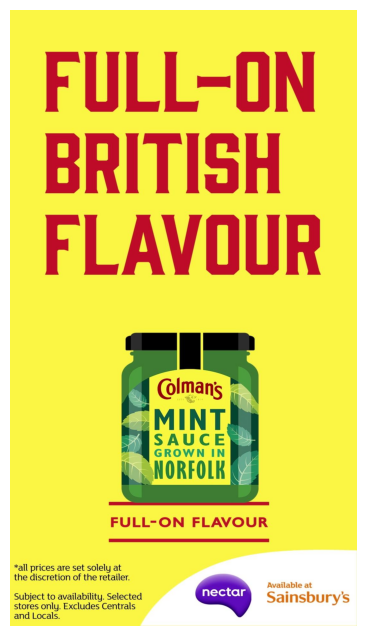

In [28]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

test_dir = Path("datasets/annotations/multi_class/yolo_11/test/images")
test_images = list(test_dir.glob("*.jpg"))
test_image = str(random.choice(test_images))

img = cv2.imread(test_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8)) 
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
results = model.predict(source=test_image, save=False)[0]


image 1/1 /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/images/img_075_jpg.rf.408c9fa7750541a7543a5863bf41ae87.jpg: 640x384 1 nectar_putty, 1 sainsburys_logo, 1 terms_conditions, 1 wave, 36.4ms
Speed: 1.5ms preprocess, 36.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


In [30]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'drink_aware', 1: 'nectar_price_lozenge', 2: 'nectar_putty', 3: 'sainsburys_logo', 4: 'terms_conditions', 5: 'wave'}
obb: None
orig_img: array([[[ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251],
        ...,
        [ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251]],

       [[ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251],
        ...,
        [ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251]],

       [[ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251],
        ...,
        [ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251]],

       ...,

       [[ 68, 246, 251],
        [ 68, 246, 251],
        [ 68, 246, 251],
        ...,
        [223, 255, 255],
        [215, 255, 254],
        [205, 247, 246]],

       [[ 68, 246, 251],
        [ 68, 246, 

In [31]:
print(f"Found {len(results.boxes)} objects")
for box in results.boxes:
    print(f"Class: {results.names[int(box.cls[0])]} | Confidence: {box.conf[0]:.2f}")

Found 4 objects
Class: wave | Confidence: 0.97
Class: sainsburys_logo | Confidence: 0.96
Class: terms_conditions | Confidence: 0.95
Class: nectar_putty | Confidence: 0.84


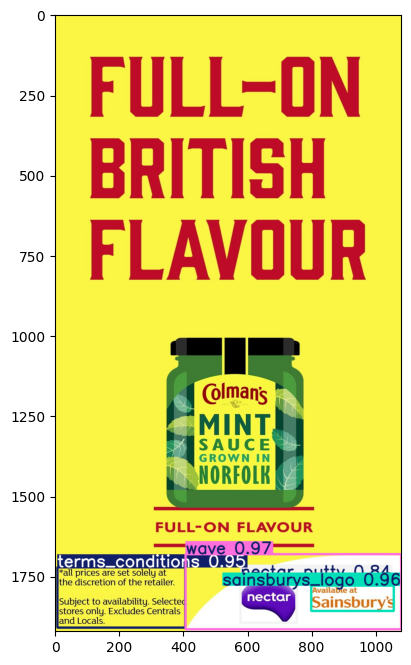

In [33]:
annotated_img = results.plot()
plt.figure(figsize=(12,8))
plt.imshow(annotated_img[...,::-1])  # Need to flip channels for proper RGB display
plt.show()


image 1/1 /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/images/img_118_jpg.rf.c87f57eebf7d438fa3c1c855ed2a9ac8.jpg: 640x640 1 nectar_putty, 1 sainsburys_logo, 1 terms_conditions, 1 wave, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/images/img_103_jpg.rf.ab8490ee39511f23badc6292f59471ce.jpg: 640x640 1 nectar_putty, 1 sainsburys_logo, 4 terms_conditionss, 1 wave, 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/azureuser/projects/object_detection/datasets/annotations/multi_class/yolo_11/test/images/img_118_jpg.rf.c87f57eebf7d438fa3c1c855ed2a9ac8.jpg: 640x640 1 nectar_putty, 1 sainsburys_logo, 1 terms_conditions, 1 wave, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

im

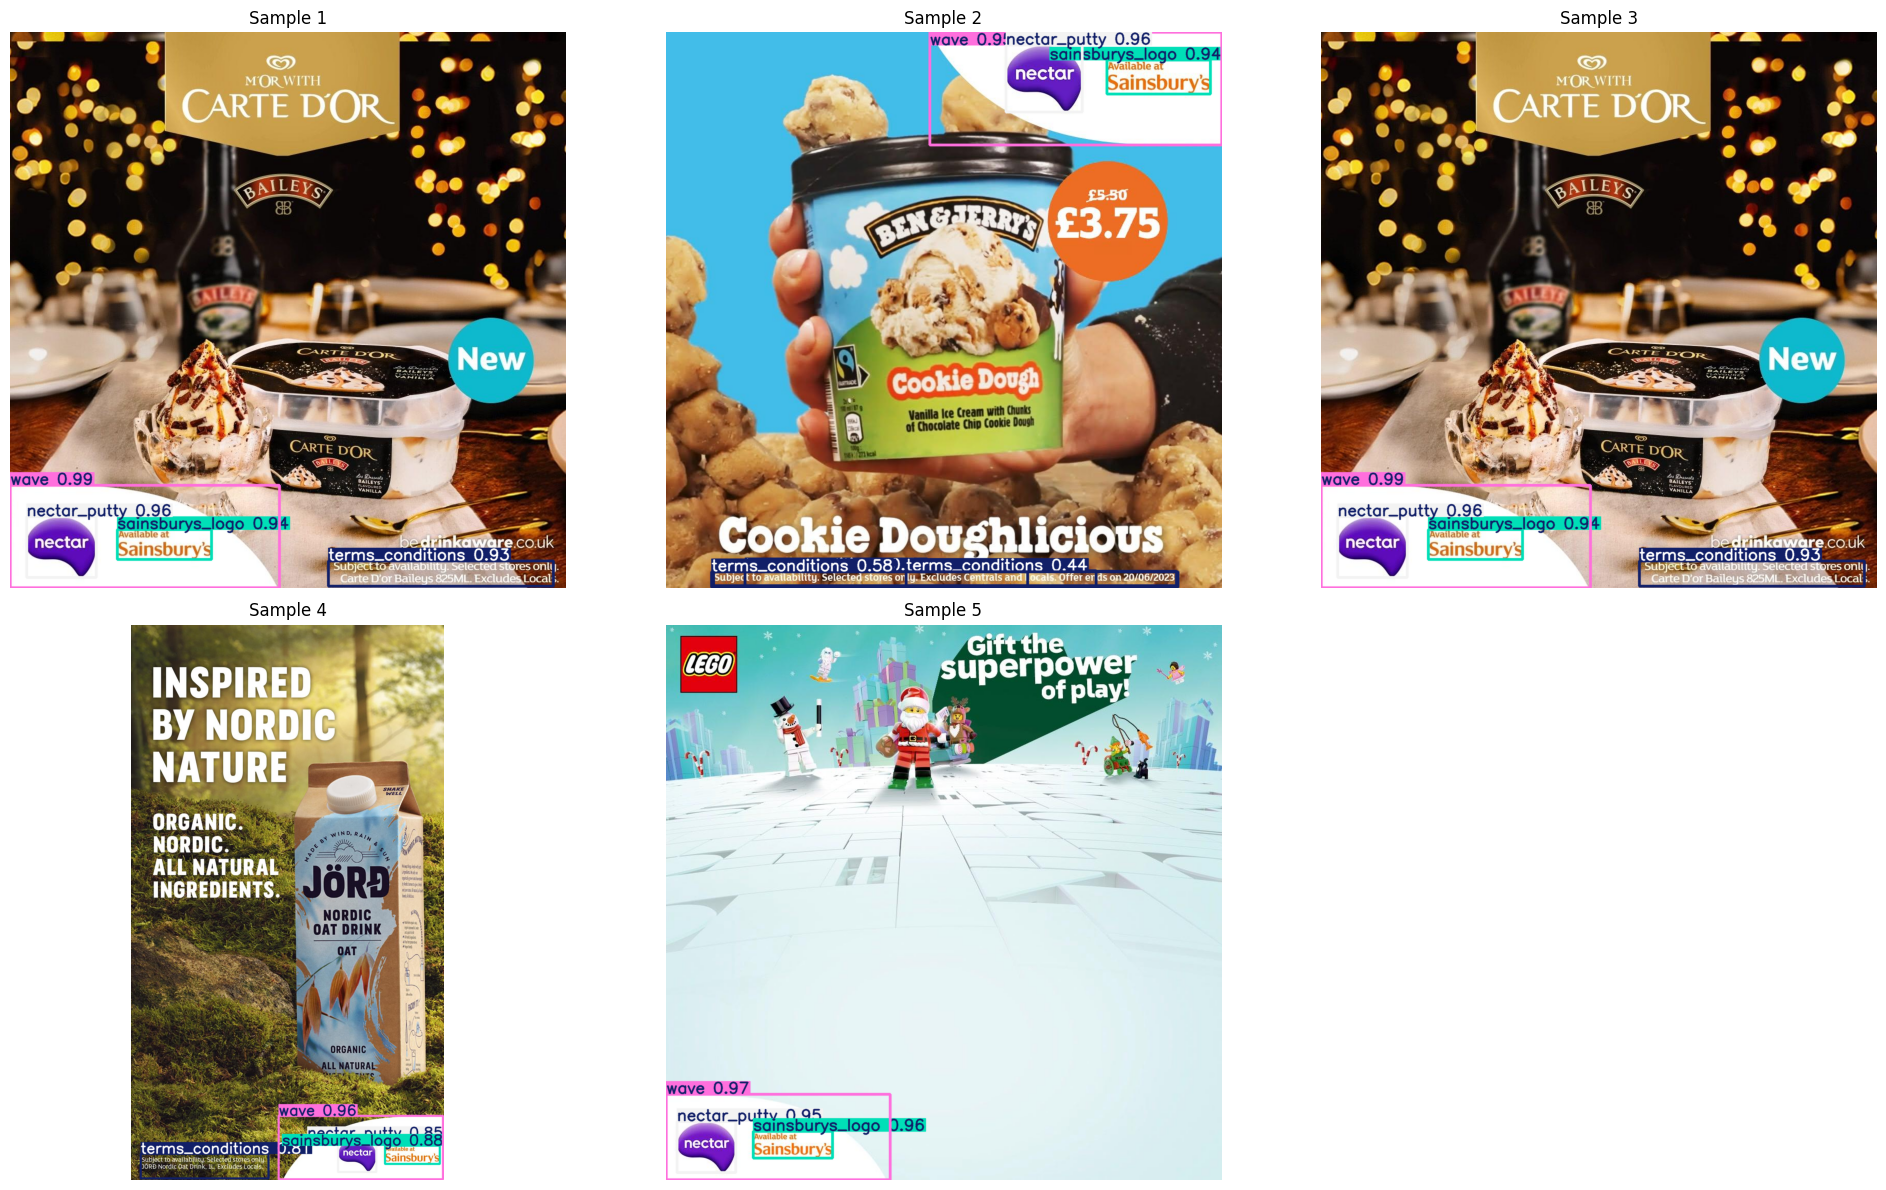

In [35]:
# Set up a 2x3 grid (6 spots but we'll use 5)
plt.figure(figsize=(20, 12))

# Sample 5 random images
for i in range(5):
    # Get random image
    test_image = str(random.choice(test_images))
    
    # Run inference
    results = model.predict(source=test_image, save=False)[0]
    
    # Get annotated image (YOLO's native visualization)
    annotated_img = results.plot()
    
    # Add to subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(annotated_img[...,::-1])  # BGR to RGB
    plt.axis('off')
    plt.title(f'Sample {i+1}')

plt.tight_layout()
plt.show()